# Part 1 Binomial Tree
## Question(a) 

In [62]:
import math
import numpy as np
import pandas as pd

### Additive binomial tree model of European Option

In [63]:
def additive_binomial_European(Option_type,S,K,r,vol,T,N):
    
    """
    
    """
    # precompute constants
    dt = T/N 
    nu = r - 0.5 * vol**2
    xu = math.sqrt(dt * (vol**2)+ (nu**2) * (dt ** 2))
    xd = -xu
    pu = 0.5 +0.5*((nu*dt)/xu)
    pd = 1-pu
    discount = np.exp(-r*dt)
    
    # initialize asset price
    St = S*np.exp(np.asarray([(N-i)*xu + i*xd for i in range(N+1)]))
    # initialize value at maturity
    if Option_type == "call":
        C = np.where(St >= K, St-K,0)
    if Option_type == "put":
        C = np.where(K >= St, K-St,0)
   
    # calculate the option price
    while (len(C) >1):
        C = discount*(pu*C[:-1]+pd*C[1:])
    return C[0]

In [100]:
S=100
K=100
r=0.06
vol=0.2
T=1
N=3

print(f'European_call: {additive_binomial_European("call",S,K,r,vol,T,N)}')
print(f'European_put: {additive_binomial_European("put",S,K,r,vol,T,N)}')

call: 11.59199120790945
put: 5.790437575507733


### Additive binomial tree model of American Option

In [102]:
def additive_binomial_American(Option_type,S,K,r,vol,T,N):
    
    """
    
    """
    # precompute constants
    dt = T/N 
    nu = r - 0.5 * vol**2
    xu = math.sqrt(dt * (vol**2)+ (nu**2) * (dt ** 2))
    xd = -xu
    pu = 0.5 +0.5*((nu*dt)/xu)
    pd = 1-pu
    discount = np.exp(-r*dt)
    
    # initialize asset price
    St = S*np.exp(np.asarray([(N-i)*xu + i*xd for i in range(N+1)]))
    # initialize value at maturity 
    if Option_type == "call":
        C = np.where(St >= K, St-K,0)
        while (len(C) >1):
            C = discount*(pu*C[:-1]+pd*C[1:])
            St = np.exp(xd)*St[:-1]
            C = np.where(C >= (St-K), C, St-K)

    if Option_type == "put":
        C = np.where(K >= St, K-St,0)
        while (len(C) >1):
            C = discount*(pu*C[:-1]+pd*C[1:])
            St = np.exp(xd)*St[:-1]
            C = np.where(C >= (K-St), C, K-St)
    return C[0]

In [101]:
S=100
K=100
r=0.06
vol=0.2
T=1
N=3
print(f'American_call: {additive_binomial_American("call",S,K,r,vol,T,N)}')
print(f'American_put: {additive_binomial_American("put",S,K,r,vol,T,N)}')

call: 11.59199120790945
put: 6.162109199031009


### Multiplicative tree model of European Option


In [68]:
def multiplicative_tree_European(Option_type,S,K,r,N,T,u,d):
    dt = T/N
    p = (np.exp(r*dt)-d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = np.asarray([(S * u**(N-i)) * (d**i) for i in range(N+1)])
    
    # call
    if Option_type == "call":
        #initialize value at maturity
        C = np.where(St >= K, St-K,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
   
    # put
    elif Option_type == "put":
        #initialize value at maturity
        C = np.where(St <= K, K-St,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
   
    return C[0]

In [69]:
Option_type = "call"
S=100
K=100
T=1
r=0.06
N=3
u=1.1
d=1/u
multiplicative_tree_European(Option_type,S,K,r,N,T,u,d)

10.145735799928826

In [70]:
Option_type = "put"
S=100
K=100
T=1
r=0.06
N=3
u=1.1
d=1/u

multiplicative_tree_European(Option_type,S,K,r,N,T,u,d)

4.322189158353709

### Multiplicative tree model of American Option



In [71]:
def multiplicative_tree_American(Option_type,S,K,r,N,T,u,d):
    dt = T/N
    p = (np.exp(r*dt)-d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = np.asarray([(S * u**(N-i)) * (d**i) for i in range(N+1)])
    
    # call
    if Option_type == "call":
        #initialize value at maturity
        C = np.where(St >= K, St-K,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
            St = St[:-1]/u
            C = np.where(C>(St-K),C,St-K)
   
    # put
    elif Option_type == "put":
        #initialize value at maturity
        C = np.where(St <= K, K-St,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
            St = St[:-1]/u
            C = np.where(C>(K-St),C,K-St)
   
    return C[0]

In [72]:
Option_type = "call"
S=100
K=100
T=1
r=0.06
N=3
u=1.1
d=1/u
multiplicative_tree_American(Option_type,S,K,r,N,T,u,d)

10.145735799928826

In [73]:
Option_type = "put"
S=100
K=100
T=1
r=0.06
N=3
u=1.1
d=1/u
multiplicative_tree_American(Option_type,S,K,r,N,T,u,d)

4.654588754602527

### General formulation of multiplicative tree model of European Option




In [74]:
def gen_multiplicative_tree_European(Option_type,S,K,r,N,T,vol):
    dt = T/N
    u = np.exp(vol*np.sqrt(dt))
    d = 1/u
    p = 0.5 + 0.5*np.sqrt(dt)*(r - 0.5*vol**2)/vol
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = np.asarray([(S * u**(N-i)) * (d**i) for i in range(N+1)])
    
    # call
    if Option_type == "call":
        #initialize value at maturity
        C = np.where(St >= K, St-K,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
   
    # put
    elif Option_type == "put":
        #initialize value at maturity
        C = np.where(St <= K, K-St,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
   
    return C[0]

In [103]:
S=100
K=100
T=1
r=0.06
N=3
vol = 0.25
print(f'European_call: {gen_multiplicative_tree_European("call",S,K,r,N,T,vol)}')
print(f'European_put: {gen_multiplicative_tree_European("put",S,K,r,N,T,vol)}')

European_call: 13.55810818183727
European_put: 7.778644249539468


### General formulation of multiplicative tree model of American Option





In [77]:
def gen_multiplicative_tree_American(Option_type,S,K,r,N,T,vol):
    dt = T/N
    u = np.exp(vol*np.sqrt(dt))
    d = 1/u
    p = 0.5 + 0.5*np.sqrt(dt)*(r - 0.5*vol**2)/vol
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = np.asarray([(S * u**(N-i)) * (d**i) for i in range(N+1)])
    
    # call
    if Option_type == "call":
        #initialize value at maturity
        C = np.where(St >= K, St-K,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
            St = St[:-1]/u
            C = np.where(C>(St-K),C,St-K)
   
    # put
    elif Option_type == "put":
        #initialize value at maturity
        C = np.where(St <= K, K-St,0)
        while(len(C) >1):
            C = disc*(p*C[:-1]+(1-p)*C[1:])
            St = St[:-1]/u
            C = np.where(C>(K-St),C,K-St)
   
    return C[0]

In [104]:
S=100
K=100
T=1
r=0.06
N=3
vol = 0.25
print(f'American_call: {gen_multiplicative_tree_European("call",S,K,r,N,T,vol)}')
print(f'American_put: {gen_multiplicative_tree_American("put",S,K,r,N,T,vol)}')

American_call: 13.55810818183727
American_put: 8.190900053547779


## Question(b)


In [92]:
import pandas as pd
from math import log as log
from math import sqrt as sqrt
from math import exp as exp
from scipy.stats import norm
from numpy import nan

def BSM(Option_type,S,K,vol,T,r):
    """
    Black-Scholes Model
    
    Option_type: "call" or "put"
    S: spot price
    K: strike price
    vol : volatility
    T : Maturity
    r: risk-free rate
    
    """
    d1 = (log(S / K) + (r + 0.5 * vol**2) * T )/ (vol * sqrt(T))
    d2 = d1 - vol * sqrt(T)       
    if Option_type == "call":
        Option = S * norm.cdf(d1) - K * exp(-r * T)*norm.cdf(d2)
        return Option
    elif Option_type == "put":
        Option = K * exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        return Option
    else:
        return "Error: parameter Option_type only takes in 'call or 'put'" 
    

def bisection(left, right, f, epsilon):
    """
    bisection root-finding method
    
    left : the left side of the interval 
    right : the right side of the interval
    f : the function
    epsilon : the error to tolerate
    
    """
    if f(left)*f(right)>0:
        return nan
        #return "No root exists in ({},{})".format(a,b)
    elif abs(f(left)) < epsilon:
        return left
    elif abs(f(right)) < epsilon:
        return right
    else:
        while abs(f((left + right) / 2)) > epsilon:
            if f(left)* f((left + right) / 2) < 0:
                right =(left + right) / 2
            elif f(left)* f((left + right) / 2) > 0:
                left=(left + right) / 2 
        return (left + right) / 2

def implied_vol(Option_type,S,K,T,r,p_market):
    def f(x):
        return BSM(Option_type,S,K,x,T,r) - p_market
    return f

In [93]:
path = "/Users/yifuhe/Desktop/"
data = pd.read_csv(path+"SPY_data2.csv")

data1 =data[(data["Expiry"]=="2019-02-15") & (data["Strike"] >= 264) & (data["Strike"] <= 274)]
data2 =data[(data["Expiry"]=="2019-03-15") & (data["Strike"] >= 263) & (data["Strike"] <= 282)]
data3 =data[(data["Expiry"]=="2019-04-18") & (data["Strike"] >= 268) & (data["Strike"] <= 277)]   

data1 = pd.concat([data1,data1,data3],axis=0).reset_index()
data1["Option"] = (data1["Ask"] + data1["Bid"])/2
data1["implied_vol"] = 0
for i in range(len(data1)):
    data1.loc[i,"implied_vol"] = bisection(0.01,3,implied_vol(
    data1["Type"][i],
    float(data1["Underlying_Price"][i]),
    float(data1["Strike"][i]),
    float(data1["Maturity"][i]),
    0.0075,
    float(data1["Option"][i])),
    1.e-6)

    
for i in range(len(data1)):
    data1.loc[i,"American"] = additive_binomial_American(data1["Type"][i],
             data1["Underlying_Price"][i],
             data1["Strike"][i],
             0.0075,
             data1["implied_vol"][i],
             data1["Maturity"][i],200)
for i in range(len(data1)):
    data1.loc[i,"European"] = additive_binomial_European(data1["Type"][i],
             data1["Underlying_Price"][i],
             data1["Strike"][i],
             0.0075,
             data1["implied_vol"][i],
             data1["Maturity"][i],200)

In [99]:
print("I only show the first 10 rows")
data1.loc[0:9,["European", "American", "Market_P"]]


I only show the first 10 rows


,European,American,Market_P
0,9.534966,9.534966,9.535
1,0.093969,0.094247,0.095
2,8.504941,8.504941,8.505
3,0.114732,0.115055,0.115
4,7.534232,7.534232,7.535
5,0.154733,0.155207,0.155
6,6.604224,6.604224,6.605
7,0.204658,0.205353,0.205
8,5.695558,5.695558,5.695
9,0.264440,0.265452,0.265


## Question(c)
### Comment: We can tell from the plot that the value of Market price , American_Binomial_tree,European_Binomial_tree are similar.

## Question(d)
Here I choose the 1 groups from different maturity.
S = 100
K = 100
T = 1
r = 0.06
vol =0.2

[0.1818405571352244, 0.09157117795107883, 0.061181079040872, 0.04593431040090579, 0.0367703119031626, 0.018407546560731625, 0.012276579421046208, 0.009209251934491292, 0.007368270480900385, 0.0061407069584609175, 0.00526375744162344, 0.004605980680591593]


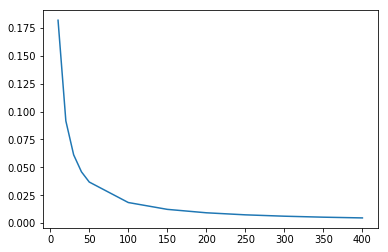

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline 
Option_type ="put"
S = 100
K = 100
T = 1
r = 0.06
vol =0.2
error = []
x = [10,20,30,40,50,100,150,200,250,300,350,400]
for N in x :
    error.append(abs(additive_binomial_European(Option_type,S,K,r,vol,T,N) - BSM(Option_type,S,K,vol,T,r) ))
print(error)
plt.plot(x,error)

# bonus


In [98]:
for i in range(len(data1)): 
    data1.loc[i,'American_Binomial_vol']=bisection(0.01,3,implied_vol(
    data1["Type"][i],
    float(data1["Underlying_Price"][i]),
    float(data1["Strike"][i]),
    float(data1["Maturity"][i]),
    0.0075,
    float(data1["American"][i])),
    1.e-6)

print("I only show the first 10 rows:")
data1.loc[0:9,["implied_vol","American_Binomial_vol"]] 

I only show the first 10 rows:


,implied_vol,American_Binomial_vol
0,0.213940,0.213921
1,0.225199,0.224857
2,0.177127,0.177086
3,0.213485,0.213506
4,0.175056,0.174697
5,0.206100,0.206164
6,0.179956,0.179724
7,0.197538,0.197626
8,0.179775,0.179897
9,0.187314,0.187407


# Part 2 Trinomial Tree
## Question(a)
### trinomial tree model of European option

In [107]:
def trinomial_tree_European_dividend(Option_type,S,K,r,vol,T,N,div,dx):
    """
    
    """
    
    # precompute constants
    dt = T/N
    nu = r - div - 0.5*vol**2
    pu = 0.5*( (vol**2 * dt + (nu*dt)**2)/(dx**2) + (nu*dt)/(dx))
    pd = 0.5*( (vol**2 * dt + (nu*dt)**2)/(dx**2) - (nu*dt)/(dx))
    pm = 1 - pu - pd
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = S * np.exp(np.asarray([(N-i)*dx for i in range(2*N+1)]))
    
    # consider option type : call
    if Option_type == "call":
        # initialize option value
        Ct = np.where(St >= K, St-K,0)
        while(len(Ct)>1):
            Ct = disc*(pu*Ct[:-2] + pm*Ct[1:-1] + pd*Ct[2:])
    
    # consider option type : call
    if Option_type == "put":
         # initialize option value
        Ct = np.where(K >= St, K-St,0)
        while(len(Ct)>1):
            Ct = disc*(pu*Ct[:-2] + pm*Ct[1:-1] + pd*Ct[2:])
    return Ct[0]

### trinomial tree model of American option

In [108]:
def trinomial_tree_American_dividend(Option_type,S,K,r,vol,T,N,div,dx):
    """
    
    """
    
    # precompute constants
    dt = T/N
    nu = r - div - 0.5*vol**2
    pu = 0.5*( (vol**2 * dt + (nu*dt)**2)/(dx**2) + (nu*dt)/(dx))
    pd = 0.5*( (vol**2 * dt + (nu*dt)**2)/(dx**2) - (nu*dt)/(dx))
    pm = 1 - pu - pd
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = S * np.exp(np.asarray([(N-i)*dx for i in range(2*N+1)]))
    
    # consider option type
    if Option_type == "call":
        # initialize option value
        Ct = np.where(St >= K, St-K,0)
        while(len(Ct)>1):
            St = St[1:-1]
            Ct = disc*(pu*Ct[:-2] + pm*Ct[1:-1] + pd*Ct[2:])
            Ct = np.where(Ct >= (St-K),Ct,(St-K))
            
    
    if Option_type == "put":
         # initialize option value
        Ct = np.where(K >= St, K-St,0)
        while(len(Ct)>1):
            St = St[1:-1]
            Ct = disc*(pu*Ct[:-2] + pm*Ct[1:-1] + pd*Ct[2:])
            Ct = np.where(Ct >= (K-St),Ct,(K-St))
    return Ct[0]

In [111]:
Option_type = "call"
S = 100
K = 100
T = 1
r = 0.06
div = 0.03
N = 3
dx = 0.2
vol =0.2
stability = dx >= vol* np.sqrt(3*(T/N))

print(f'Stability condition is {stability}')
print("European_call: ")
print(trinomial_tree_European_dividend("call",S,K,r,vol,T,N,div,dx))
print("European_put: ")
print(trinomial_tree_European_dividend("put",S,K,r,vol,T,N,div,dx))
print("American_call: ")
print(trinomial_tree_American_dividend("call",S,K,r,vol,T,N,div,dx))
print("American_put: ")
print(trinomial_tree_American_dividend("put",S,K,r,vol,T,N,div,dx))

Stability condition is True
European_call: 
8.42533617724738
European_put: 
5.557257626603268
American_call: 
8.42533617724738
American_put: 
5.931401358884872


## Question(b)
This question is similar as part_1

In [52]:
def BSM_dividend(Option_type,S,K,vol,div,expir,r):
    d1 = (log(S / K) + (r- div+ 0.5 * vol**2) * expir) / (vol * sqrt(expir))
    d2 = d1 - vol * sqrt(expir)
    if Option_type == "call":
        option_price = S *exp(- div*expir)* norm.cdf(d1) - K * exp(-r * expir)*norm.cdf(d2)
        return option_price
    if Option_type == "put":
        option_price = K * exp(-r * expir) * norm.cdf(-d2) - S *exp(- div*expir)* norm.cdf(-d1)
        return option_price



Option_type = "call"
S = 100
K = 100
T = 1
r = 0.06
div = 0.03
N = 1000
dx = 0.2
vol =0.25
stability = dx >= vol* np.sqrt(3*(T/N))
print(f'dx is 0.2, N is 500 and stability condition is {stability}')
print(f'European trinomial call: {trinomial_tree_European_dividend(Option_type,S,K,r,vol,T,N,div,dx)}')
print(f'American trinomial put: {trinomial_tree_American_dividend(Option_type,S,K,r,vol,T,N,div,dx)}')
print(f'BSM: {BSM_dividend(Option_type,S,K,vol,div,T,r)}')

dx is 0.2, N is 500 and stability condition is True
European trinomial call: 10.14132870865628
American trinomial put: 10.142102527033195
BSM: 11.013078647539281


## Question(c)
### Comment: We can tell from the plot that the value of American_Trinomial_tree,European_Trinomial_tree are similar. But the value calculated by BSM has some small difference.

## Question(d)

Stability condition is True
[0.19295715968476124, 0.09503463583403793, 0.06307128044456078, 0.06307128044456078, 0.037711800538067664, 0.01880834214773408, 0.012528511703278511, 0.00939251533652019, 0.007512161786465299, 0.0062591089711823145, 0.005364323392191395, 0.00469337183601759]


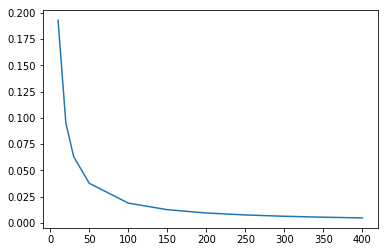

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
Option_type =="put"
S = 100
K = 100
T = 1
r = 0.06
vol =0.2
div = 0.03
dx = 0.25
stability = dx >= vol* np.sqrt(3*(T/10))

print(f'Stability condition is {stability}')

error = []
x = [10,20,30,30,50,100,150,200,250,300,350,400]
for N in x :
    dx = vol*np.sqrt(3*(T/N))
    error.append(abs(trinomial_tree_European_dividend(Option_type,S,K,r,vol,T,N,div,dx) - BSM_dividend(Option_type,S,K,vol,div,T,r)))
   
print(error)
plt.plot(x,error)

# Part 3 Pricing Exotic Options
## Question(a)

### Binomial tree model of European call barrier option
### Up-and-out

In [19]:
"""
def European_UO_TREE_call(K,T,S,r,vol,H,N):
    dt = T/N
    nu = r - 0.5*(vol**2)
    xu = np.sqrt(dt*(vol**2) + (nu*dt)**2)
    xd = - xu
    pu = 0.5 + 0.5*( (nu*dt) /xu)
    pd = 1- pu
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = S * np.exp(np.asarray([(N-i)*xu + i*xd for i in range(N+1)]))
    
    #iniialize value at maturity
    C = np.asarray([np.max([St[q] - K,0]) if St[q] < H else 0 for q in range(len(St))])
    
    while (len(C)>1):
        St = np.exp(xd) * St[:-1]
        C = disc*(pu*C[:-1] + pd*C[1:])
        
        C = np.where(C < K-St, K-St, C)
        C= np.where(St > H, C,0)
    return C[0]
"""

def European_UO_TREE_call(K,T,S,r,sig,H,N):
    dt = T/N
    nu = r - 0.5*sig**2
    xu = np.sqrt(sig**2 * dt + (nu*dt)**2)
    xd = -xu
    pu = 0.5 + 0.5*(nu*dt)/xu
    pd = 1 - pu
    disc = np.exp(-r * dt)
    St = S * np.exp(np.asarray([(N-i)*xd + i * xu for i in range(N+1)]))
    C = np.asarray([np.max([St[j] - K,0]) if St[j] < H else 0 for j in range(len(St))])
    while (len(C) > 1):
        St = np.exp(xu) * St[:-1]
        C = disc*(pd * C[:-1] + pu * C[1:])
        C = np.where(St < H, C, 0)
    return C[0]

S = 10
K = 10
T = 0.3
r = 0.01
vol = 0.2
H = 11 
N = 10000
print( "European_UO_TREE_call:")
European_UO_TREE_call(K,T,S,r,vol,H,N)

European_UO_TREE_call:


0.05498969599617116

### Up-and-in

In [20]:
def European_UI_TREE_call(K,T,S,r,vol,H,N):
    dt = T/N
    nu = r - 0.5*(vol**2)
    xu = np.sqrt(dt*(vol**2) + (nu*dt)**2)
    xd = - xu
    pu = 0.5 + 0.5*( (nu*dt) /xu)
    pd = 1- pu
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = S * np.exp(np.asarray([(N-i)*xu + i*xd for i in range(N+1)]))
    
    #iniialize value at maturity
    C = np.asarray([np.max([St[q] - K,0]) if St[q] > H else 0 for q in range(len(St))])
    
    while (len(C)>1):
        St = np.exp(xd) * St[:-1]
        C = disc*(pu*C[:-1] + pd*C[1:])
        
        C = np.where(C < K-St, K-St, C)
        C = np.where(St > H, C,0)
    return C[0]

### Down-and-in

In [21]:
def European_DI_TREE_call(K,T,S,r,vol,H,N):
    dt = T/N
    nu = r - 0.5*(vol**2)
    xu = np.sqrt(dt*(vol**2) + (nu*dt)**2)
    xd = - xu
    pu = 0.5 + 0.5*( (nu*dt) /xu)
    pd = 1- pu
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = S * np.exp(np.asarray([(N-i)*xu + i*xd for i in range(N+1)]))
    
    #iniialize value at maturity
    C = np.asarray([np.max([St[q] - K,0]) if St[q] > H else 0 for q in range(len(St))])
    
    while (len(C)>1):
        St = np.exp(xd) * St[:-1]
        C = disc*(pu*C[:-1] + pd*C[1:])
        
        C = np.where(C < K-St, K-St, C)
        C = np.where(St > H, C,0)
    return C[0]

### Down-and-out

In [114]:
def European_DO_TREE_call(K,T,S,r,vol,H,N):
    dt = T/N
    nu = r - 0.5*(vol**2)
    xu = np.sqrt(dt*(vol**2) + (nu*dt)**2)
    xd = - xu
    pu = 0.5 + 0.5*( (nu*dt) /xu)
    pd = 1- pu
    disc = np.exp(-r*dt)
    
    # initialize asset price
    St = S * np.exp(np.asarray([(N-i)*xu + i*xd for i in range(N+1)]))
    
    #iniialize value at maturity
    C = np.asarray([np.max([St[q] - K,0]) if St[q] > H else 0 for q in range(len(St))])
    
    while (len(C)>1):
        St = np.exp(xd) * St[:-1]
        C = disc*(pu*C[:-1] + pd*C[1:])
        
        C = np.where(C < K-St, K-St, C)
        C = np.where(St > H, C,0)
    return C[0]

## Question(b)
### BS model

In [22]:
import scipy.stats

In [23]:
def BSM(Option_type,S,K,vol,T,r):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - (vol * np.sqrt(T))
    if Option_type == "call":
        option_price = S * scipy.stats.norm.cdf(d1) - K * np.exp(-r * T)*scipy.stats.norm.cdf(d2)
        return option_price
    if Option_type == "put":
        option_price = K * np.exp(-r * T) * scipy.stats.norm.cdf(-d2) - S * scipy.stats.norm.cdf(-d1)
        return option_price
Option_type = "call"
S = 10
K = 10
T = 0.3
vol = 0.2
r = 0.01
H = 11   
BSM(Option_type,S,K,vol,T,r) 

0.4512876448808987

### European Up and Out, Up and In, Down and Out, Down and In Barrier Options in explicit formulas

In [25]:
def European_UO_BS_call(S,K,vol,T,r,H):
    nu = r - 0.5 * vol**2
    disc = np.exp(-r*T)
    C_sk = BSM("call",S,K,vol,T,r)
    C_sh = BSM("call",S,H,vol,T,r)
    d_sh = (np.log(S / H) + nu * T) / (vol * np.sqrt(T))
    d_hs = (np.log(H / S) + nu * T) / (vol * np.sqrt(T))
    C_1 = BSM("call",(H**2)/S,K,vol,T,r)
    C_2 = BSM("call",(H**2)/S,H,vol,T,r)
    stdnorm1 = scipy.stats.norm.cdf(d_sh)
    stdnorm2 = scipy.stats.norm.cdf(d_hs)
    return C_sk - C_sh - (H-K)*disc*stdnorm1 - (H/S)**(2*nu/vol**2)*(C_1-C_2-(H-K)*disc*stdnorm2)

def European_UI_BS_call(S,K,vol,T,r,H):
    nu = r - 0.5 * vol**2
    disc = np.exp(-r*T)
    P_1 = BSM("put",(H**2/S),K,vol,T,r)
    P_2 = BSM("put",(H**2/S),H,vol,T,r)
    C_sh = BSM("call",S,H,vol,T,r)
    d_hs = (np.log(H / S) + nu * T) / (vol * np.sqrt(T))
    d_sh = (np.log(S / H) + nu * T) / (vol * np.sqrt(T))
    stdnorm1 = scipy.stats.norm.cdf(-d_hs)
    stdnorm2 = scipy.stats.norm.cdf(d_sh)
    return (H/S)**(2*nu/vol**2)*(P_1-P_2 +(H-K)*disc*stdnorm1) + C_sh +(H-K)*disc*stdnorm2

def European_DO_BS_call(S,K,vol,T,r,H):
    nu = r - 0.5 * vol**2
    C_sk = BSM("call",S,K,vol,T,r)
    C_1 = BSM("call",(H**2)/S,K,vol,T,r)
    return C_sk - (H/S)**(2*vol)*C_1

def European_DI_BS_call(S,K,vol,T,r,H):
    nu = r - 0.5 * (vol**2)
    C_1 = BSM("call",(H**2)/S,K,vol,T,r)
    return C_1 * (H/S)**(2*nu/vol**2)


S = 10
K = 10
T = 0.3
vol = 0.2
r = 0.01
H = 11

print(European_UO_BS_call(S,K,vol,T,r,H))
print(European_UI_BS_call(S,K,vol,T,r,H))
#print(European_DO_BS_call(S,K,vol,T,r,H))
#print(European_DI_BS_call(S,K,vol,T,r,H))

0.05309279660325303
0.3981948482776454


In [27]:
S = 10
K = 10
T = 0.3
vol = 0.2
r = 0.01
H = 11

print(BSM("call",S,K,vol,T,r))
print(European_UO_BS_call(S,K,vol,T,r,H)+European_UI_BS_call(S,K,vol,T,r,H))
print(European_DO_BS_call(S,K,vol,T,r,H)+European_DI_BS_call(S,K,vol,T,r,H))

0.4512876448808987
0.45128764488089845


### Check the value of binomial tree and BSM formula

In [28]:
print( "European_UO_TREE_call:")
print(European_UO_TREE_call(K,T,S,r,vol,H,N))
print( "European_UO_BS_call:")
print(European_UO_BS_call(S,K,vol,T,r,H))


European_UO_TREE_call:
0.05498969599617116
European_UO_BS_call:
0.05309279660325303


## Question(c)
### Check the value by two method

In [31]:
S = 10
K = 10
T = 0.3
vol = 0.2
r = 0.01
H = 11
div = 0
N=10000

print(f'European Up-and-In call Option using explicit formula: {European_UI_BS_call(S,K,vol,T,r,H)}')
print( f'Up-and-In calculated by In-Out Parity: {BSM("call",S,K,vol,T,r)-European_UO_BS_call(S,K,vol,T,r,H)}')
#print(f'European Up-and-In call Option using binomial tree: {European_UI_TREE_call(K,T,S,r,vol,H,N)}')

European Up-and-In call Option using explicit formula: 0.3981948482776454
Up-and-In calculated by In-Out Parity: 0.3981948482776456


## Question(d)
### Binomial tree model of American put barrier option
### up-and-in put

In [32]:
def American_UI_Tree_put(K,T,S,r,H,N,sigma):
    dt=T/N
    nu=r-0.5*sigma**2
    dxu=np.sqrt(sigma**2*dt+(nu*dt)**2)
    dxd=-dxu
    pu=1/2+1/2*(nu*dt/dxu)
    pd=1-pu
    disc=np.exp(-r*dt)
    St=np.asarray([S*np.exp(dxd*(N-2*i)) for i in range(N+1)])
    StMax=np.max(St)
    C=np.where(K-St>0,K-St,0)
    C=np.where(StMax<H,C,0)
    while(len(C)>1):
        St=St[:-1]/np.exp(dxd)
        StMax=np.max(St)
        C=disc*(pu*C[1:]+pd*C[:-1])
        C=np.where(K-St>C,K-St,C)
        C=np.where(StMax<H,C,0)
    return additive_binomial_American("put",S,K,r,sigma,T,N)-C[0]
K=10
T=0.3
S=10
r=0.01
div=0
H=11
sigma=0.2
N=10000
print(f'American_UI_Tree_put(K,T,S,r,H,N,sigma): {American_UI_Tree_put(K,T,S,r,H,N,sigma)}')

American_UI_Tree_put(K,T,S,r,H,N,sigma): 0.3824118292775121


# Part 4
## Question(a)
## Explicit Finite Difference --- European options

In [4]:
import numpy as np
def European_EFD(Option_type, K, T, S, vol, r, div, Nj, N, dx):
    """

    """
    # precompute constants
    dt = T / N
    nu = r - div - 0.5 * (vol ** 2)
    edx = np.exp(dx)

    pu = 0.5 * dt * ((vol / dx) ** 2 + nu / dx)
    pm = 1.0 - dt * (vol / dx) ** 2 - r * dt
    pd = 0.5 * dt * ((vol / dx) ** 2 - nu / dx)
    # pm = 1 - pu - pd
    
    # initialise the asset prices at maturity N
    St=S*np.exp(np.asarray([Nj*(-dx)+i*(dx) for i in range(2*Nj+1)]))


    # initialise option values at maturity
    if Option_type == "call":
        C = np.where(St > K ,St-K, 0)
    # calculate the option price
        while(N>0):
            C=pd*C[:-2]+pm*C[1:-1]+pu*C[2:]
            C_max=C[-1]+St[-1]-St[-2]
            C_min=C[0]
            C=np.hstack([[C_min],C,[C_max]])
            N=N-1

    if Option_type == "put":
        C = np.where(St < K, K-St,0)
    
        while(N>0):
            C=pd*C[:-2]+pm*C[1:-1]+pu*C[2:]
            C_max=C[-1]
            C_min=C[0] + St[1] - St[0]
            C=np.hstack([[C_min],C,[C_max]])
            N=N-1

    return C[Nj]

In [5]:
Option_type = "call"
K=100
S=100
T=1
vol=0.2
r=0.06
div=0.03
N=3
Nj=3
dx=0.2
stability= dx>=vol*np.sqrt(3*T/N)

print(f"stability condition is {stability}")
print(f'call: {European_EFD("call", K, T, S, vol, r, div, Nj, N, dx)}')
print(f'put: {European_EFD("put", K, T, S, vol, r, div, Nj, N, dx)}')

stability condition is True
call: 8.54547955777436
put: 5.621689170461753


## Question(b)
## Implicit Finite Difference --- European options

In [42]:
def European_IFD(Option_type, K, T, S, vol, r, div, Nj, N, dx):
    dt = T / N
    nu = r - div - 0.5 * vol**2
    
    pu = (-0.5) * dt * ((vol/dx)**2+nu/dx)
    pm = 1 + dt * (vol/dx)**2 + r * dt
    pd= (-0.5)* dt * ((sigma/dx)**2 - nu / dx)
    
    St=np.asarray([S*np.exp((i-Nj)*dx) for i in range(2*Nj+1)])
    
    C=np.where(St-K>=0,St-K,0)
    
    if Option_type == "call":
        lambdaU=St[-1]-St[-2]
        lambdaL=0.0
        C=np.where(St>K,St-K,0)
    if Option_type == "put":
        lambdaU=0.0
        lambdaL=St[0]-St[1]
        C=np.where(K>St,K-St,0)
    
    
    def solve_implicit(C,pu,pm,pd,lambdaL,lambdaU):
        pmp=np.zeros(2*Nj-1)
        pp=np.zeros(2*Nj-1)
        pmp[0]=pm+pd
        pp[0]=C[1]+pd*lambdaL
        for i in range(2*Nj-2):
            pmp[i+1]=pm-pu*pd/pmp[i]
            pp[i+1]=C[i+2]-pp[i]*pd/pmp[i]
        
        C[-1]=(pp[-1]+pmp[-1]*lambdaU)/(pu+pmp[-1])
        C[-2]=C[-1]-lambdaU
        for i in range(2*Nj-2):
            C[-(i+3)]=(pp[-(i+2)]-pu*C[-(i+2)])/pmp[-(i+2)]
        C[0]=C[1]-lambdaL
        return C
    
    while(N>0):
        C=solve_implicit(C,pu,pm,pd,lambdaL,lambdaU)
        N-=1
    
    return C[Nj]

In [43]:
K=100
S=100
T=1
vol=0.2
r=0.06
div=0.03
N=3
Nj=3
dx=0.2
stability= dx>=vol*np.sqrt(3*T/N)

print(f"stability condition is {stability}")
print(f'call: {European_IFD("call", K, T, S, vol, r, div, Nj, N, dx)}')
print(f'put: {European_IFD("put", K, T, S, vol, r, div, Nj, N, dx)}')

stability condition is True
call: 8.267442301141168
put: 11.041200811107565


## Question(c)
## Crank-Nicolson Finite Difference --- European options

In [63]:
def European_CNFD(Option_type, K, T, S, vol, r, div, Nj, N, dx):
    """

    """
    # precompute constants
    dt = T / N
    nu = r - div - 0.5 * (vol ** 2)
    edx = np.exp(dx)

    pu=-0.25*dt*((vol/dx)**2+nu/dx)
    pm=1+0.5*dt*(vol/dx)**2+0.5*r*dt
    pd=-0.25*dt*((vol/dx)**2-nu/dx)
    # pm = 1 - pu - pd
    
    # initialize asset price
    St=np.asarray([S*np.exp((i-Nj)*dx) for i in range(2*Nj+1)])
    
    # initialize option price
    if Option_type == "call":
        C=np.where(St>K,St-K,0)
        lambdaU=St[-1]-St[-2]
        lambdaL=0.0
    if Option_type == "put":
        C=np.where(K>St,K-St,0)
        lambdaU=0.0
        lambdaL=St[0]-St[1]
           
    def solve_GN(C,pu,pm,pd,lambdaU,lambdaL):
        pmp=np.zeros(2*Nj-1)
        pp=np.zeros(2*Nj-1)
        pmp[0]=pm+pd
        pp[0]=-pu*C[2]-(pm-2)*C[1]-pd*C[0]+pd*lambdaL
        
        for i in range(2*Nj-2):
            pmp[i+1]=pm-pu*pd/pmp[i]
            pp[i+1]=-pu*C[i+3]-(pm-2)*C[i+2]-pd*C[i+1]-pp[i]*pd/pmp[i]
        
        C[-1]=(pp[-1]+pmp[-1]*lambdaU)/(pu+pmp[-1])
        C[-2]=C[-1]-lambdaU
        for i in range(2*Nj-2):
            C[-(i+3)]=(pp[-(i+2)]-pu*C[-(i+2)])/pmp[-(i+2)]
        C[0]=C[1]-lambdaL
        return C
    
    while(N>0):
        C=solve_GN(C,pu,pm,pd,lambdaU,lambdaL)
        N-=1
    
    return C[Nj]

In [66]:
Option_type = "call"
K=100
S=100
T=1
vol=0.2
r=0.06
div=0.03
N=3
Nj=3
dx=0.2
stability=dx>=vol*np.sqrt(3*T/N)

print(f"stability condition is {stability}")
print(f'call: {European_CNFD("call", K, T, S, vol, r, div, Nj, N, dx)}')
print(f'put: {European_CNFD("put", K, T, S, vol, r, div, Nj, N, dx)}')

stability condition is True
call: 8.031447092729394
put: 5.147317372059234


## Question(d)
### European Explicit Finite Difference method

In [85]:
def estimate_error(T,err,sigma,nsd):
    dt=err/(1+3*sigma**2)
    dx=sigma*np.sqrt(3*dt)
    Nj=math.floor((nsd*sigma*np.sqrt(T)/dx-1)/2)
    N=math.ceil(T/dt)
    return dt,dx,Nj,N
    
print(estimate_error(1,0.001,0.2,6))

(0.0008928571428571428, 0.010350983390135314, 57, 1120)


## Question(e)

In [88]:
Option_type = "call"
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03
N=1120
Nj=57
dx=0.010350983390135314
stability= dx>=vol*np.sqrt(3*T/N)

#print(f"stability condition is {stability}")
print(f'call: {European_EFD("call", K, T, S, vol, r, div, Nj, N, dx)}')
print(f'put: {European_EFD("put", K, T, S, vol, r, div, Nj, N, dx)}')



#print(f"stability condition is {stability}")
print(f'call: {European_IFD("call", K, T, S, vol, r, div, Nj, N, dx)}')
print(f'put: {European_IFD("put", K, T, S, vol, r, div, Nj, N, dx)}')


#print(f"stability condition is {stability}")
print(f'call: {European_CNFD("call", K, T, S, vol, r, div, Nj, N, dx)}')
print(f'put: {European_CNFD("put", K, T, S, vol, r, div, Nj, N, dx)}')

call: 11.01391520363616
put: 8.14466186960782
call: 11.011363234265596
put: 8.142315099727044
call: 11.012639370447193
put: 8.143488648290164


## Question(f)
ConsiderS0 =100,K=100,T=1year,σ=25%,r=6%,δ=0.03. Calculate and report the price for European Call and Put using explicit, implicit FD and Crank-Nicolson methods and the number of steps that you calculated in the previous point (part d).

In [49]:
def EFD_iterations_Call(K,T,S,r,div,vol):
    N=1
    err=1.0
    price = BSM_dividend("call",S, K, vol,div,T, r)
    while(err>0.001):
        N+=100
        dt=T/N
        dx=sigma*np.sqrt(3*dt)
        Nj=math.ceil((math.sqrt(N/3)*6-1)/2)
        err=abs(European_EFD("call", K, T, S, vol, r, div, Nj, N, dx)-price)
    return dx,dt,N,Nj
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03

print(EFD_iterations_Call(K,T,S,r,div,vol))

(0.0104990131391452, 0.0005878894767783657, 1701, 71)


In [ ]:
def EFD_iterations_Put(K,T,S,r,div,vol):
    N=1
    err=1.0
    price = BSM_dividend("put",S, K, vol,div,T, r)
    while(err>0.001):
        N+=100
        dt=T/N
        dx=sigma*np.sqrt(3*dt)
        Nj=math.ceil((math.sqrt(N/3)*6-1)/2)
        err=abs(European_EFD("put", K, T, S, vol, r, div, Nj, N, dx)-price)
    return dx,dt,N,Nj
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03

print(EFD_iterations_Call(K,T,S,r,div,vol))

In [54]:
def IFD_iterations_Call(K,T,S,r,div,vol):
    N=1
    err=1.0
    price = BSM_dividend("call",S, K, vol,div,T, r)
    while(err>0.001):
        N+=100
        dt=T/N
        dx=sigma*np.sqrt(3*dt)
        Nj=math.ceil((math.sqrt(N/3)*6-1)/2)
        err=abs(European_IFD("call", K, T, S, vol, r, div, Nj, N, dx)-price)
    return dx,dt,N,Nj
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03

print(IFD_iterations_Call(K,T,S,r,div,vol))

(0.006680735769458949, 0.00023803856224708403, 4201, 112)


In [69]:
def IFD_iterations_Put(K,T,S,r,div,vol):
    N=1
    err=1.0
    price = BSM_dividend("put",S, K, vol,div,T, r)
    while(err>0.001):
        N+=100
        dt=T/N
        dx=sigma*np.sqrt(3*dt)
        Nj=math.ceil((math.sqrt(N/3)*6-1)/2)
        err=abs(European_IFD("put", K, T, S, vol, r, div, Nj, N, dx)- price)
    return dx,dt,N,Nj
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03

print(IFD_iterations_Put(K,T,S,r,div,vol))

(0.006315467585478457, 0.00021272069772388852, 4701, 119)


In [72]:
def CNFD_iterations_Call(K,T,S,r,div,vol):
    N=1000
    err=1.0
    price = BSM_dividend("call",S, K, vol,div,T, r)
    while(err>0.001):
        N+=100
        dt=T/N
        dx=sigma*np.sqrt(3*dt)
        Nj=int(np.floor((np.sqrt(N/3)*6-1)/2))
        err=abs(European_CNFD("call", K, T, S, vol, r, div, Nj, N, dx)-price)
    return dx,dt,N,Nj
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03

print(CNFD_iterations_Call(K,T,S,r,div,vol))

(0.00804084401128346, 0.0003448275862068965, 2900, 92)


In [73]:
def CNFD_iterations_Put(K,T,S,r,div,vol):
    N=1
    err=1.0
    price = BSM_dividend("put",S, K, vol,div,T, r)
    while(err>0.001):
        N+=100
        dt=T/N
        dx=sigma*np.sqrt(3*dt)
        Nj=math.ceil((math.sqrt(N/3)*6-1)/2)
        err=abs(European_CNFD("put", K, T, S, vol, r, div, Nj, N, dx)-price)
    return dx,dt,N,Nj
K=100
S=100
T=1
vol=0.25
r=0.06
div=0.03

print(CNFD_iterations_Put(K,T,S,r,div,vol))

(0.0074250147386688845, 0.00029403116730373417, 3401, 101)


In [95]:
v1 = pd.Series([0.0104990131391452, 0.0005878894767783657, 1701, 71])
v2 = pd.Series([0.006680735769458949, 0.00023803856224708403, 4201, 112])
v3 = pd.Series([0.00804084401128346, 0.0003448275862068965, 2900, 92])
table = pd.DataFrame([v1,v2,v3])
table

,0,1,2,3
0,0.010499,0.000588,1701.0,71.0
1,0.006681,0.000238,4201.0,112.0
2,0.008041,0.000345,2900.0,92.0


## bonus

In [115]:
def Rannacher(K,T,S,r,div,N,Nj,sigma,dx): 
    dt=T/N
    nu=r-div-0.5*sigma**2
    pu=-0.25*dt*((sigma/dx)**2+nu/dx)
    pm=1+0.5*dt*(sigma/dx)**2+0.5*r*dt
    pd=-0.25*dt*((sigma/dx)**2-nu/dx)
    pu1=-0.25*(dt/4)*((sigma/dx)**2+nu/dx)
    pm1=1+0.5*(dt/4)*(sigma/dx)**2+0.5*r*dt
    pd1=-0.25*(dt/4)*((sigma/dx)**2-nu/dx)

    
    St=np.asarray([S*np.exp((i-Nj)*dx) for i in range(2*Nj+1)]) 
    C=np.where(St-K>=0,St-K,0)
    lambdaU=St[-1]-St[-2]
    lambdaL=0.0
    
    def solve_implicit(C,pu,pm,pd,lambdaL,lambdaU):
        pmp=np.zeros(2*Nj-1)
        pp=np.zeros(2*Nj-1)
        pmp[0]=pm+pd
        pp[0]=C[1]+pd*lambdaL 
        for i in range(2*Nj-2):
            pmp[i+1]=pm-pu*pd/pmp[i]
            pp[i+1]=C[i+2]-pp[i]*pd/pmp[i]
            
        C[-1]=(pp[-1]+pmp[-1]*lambdaU)/(pu+pmp[-1]) 
        C[-2]=C[-1]-lambdaU
        for i in range(2*Nj-2):
            C[-(i+3)]=(pp[-(i+2)]-pu*C[-(i+2)])/pmp[-(i+2)]
            C[0]=C[1]-lambdaL
            return C
    for i in range(4): 
        C=solve_implicit(C,pu1,pm1,pd1,lambdaL,lambdaU)
        
    def solve_GN(C,pu,pm,pd,lambdaU,lambdaL):
        pmp=np.zeros(2*Nj-1)
        pp=np.zeros(2*Nj-1)
        pmp[0]=pm+pd 
        pp[0]=-pu*C[2]-(pm-2)*C[1]-pd*C[0]+pd*lambdaL
        
        for i in range(2*Nj-2):
            pmp[i+1]=pm-pu*pd/pmp[i] 
            pp[i+1]=-pu*C[i+3]-(pm-2)*C[i+2]-pd*C[i+1]-pp[i]*pd/pmp[i]

            C[-1]=(pp[-1]+pmp[-1]*lambdaU)/(pu+pmp[-1])
            C[-2]=C[-1]-lambdaU
            for i in range(2*Nj-2):
                C[-(i+3)]=(pp[-(i+2)]-pu*C[-(i+2)])/pmp[-(i+2)]
            C[0]=C[1]-lambdaL
            return C
    while(N>0): 
        C=solve_GN(C,pu,pm,pd,lambdaU,lambdaL)  
        N-=1
    return C[Nj]